# 数据理解

为了预测客户是否对车辆保险感兴趣，您可以获得有关人口统计数据(性别、年龄、地区编码类型)、车辆(车辆年龄、损坏情况)、保单(保费、采购渠道)等信息。

数据划分为训练集和测试集，训练数据包含381109笔客户资料，每笔客户资料包含12个字段，1个客户ID字段、10个输入字段及1个目标字段-Response是否响应(1代表感兴趣，0代表不感兴趣)。测试数据包含127037笔客户资料；字段个数与训练数据相同，目标字段没有值。字段的定义可参考下文。

字段|字段翻译|角色|测量类型|不同值个数
---|:--:|---:|--:|--:
ID |客户ID|记录标识|无类型|381109
Gender |性别|输入|分类型|2
Age |年龄|输入|数值型|66
Driving_License |是否有驾照|输入|分类型|2
Region_Code |用户所在区域的编码|输入|分类型|53
Previously_Insured |之前是否投保|输入|分类型|2
Vehicle_Age |车龄|输入|分类型|3
Vehicle_Damage |车辆损坏情况|输入|分类型|2
Annual_Premium |年度保费（卢比）|输入|数值型|48838
Policy_Sales_Channel |销售渠道|输入|分类|155
Vintage |往来时长（天）|输入|数值型|290
Response |是否响应|目标|分类型|2

# 数据读入和预览

In [ ]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns 




In [99]:
# 读入训练集
train = pd.read_csv('data/train.csv')
train.head() 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [78]:
# 读入测试集
test = pd.read_csv('data/test.csv')
test.head() 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [53]:
print(train.info())
print('-' * 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.9+ MB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Rang

# 探索性分析EDA

我们基于训练数据集进行探索性数据分析。

## 描述性分析

首先对数据集中数值型属性进行描述性统计分析。

In [13]:
desc_table = train.describe().T
desc_table

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


从以上描述性分析结果可以得出：

- 客户年龄：客户的年龄范围在20 ~ 85岁之间，平均年龄是38岁，青年群体居多；
- 是否有驾照：99.89%客户都持有驾照；
- 之前是否投保：45.82%的客户已经购买了车辆保险；
- 年度保费：客户的保费范围在2630 ~ 540165之间，平均的保费金额是30564。
- 往来时长：此数据基于过去一年的数据，客户的往来时间范围在10~299天之间，平均往来时长为154天。
- 是否响应：平均来看，客户对车辆保险感兴趣的概率为12.25%。

## 目标变量的分布

In [14]:
train['Response'].value_counts() 

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

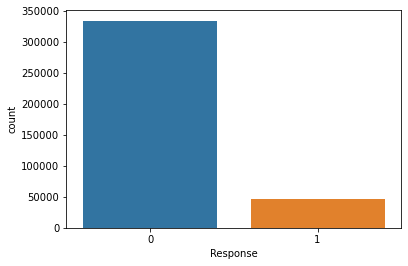

In [15]:
sns.countplot(train.Response)

训练集共有381109笔客户资料，其中感兴趣的有46710人，占比12.3%，不感兴趣的有334399人，占比87.7%。

## 性别与是否感兴趣

In [16]:
pd.crosstab(train['Gender'], train['Response']) 

Response,0,1
Gender,,
Female,156835,18185
Male,177564,28525


<AxesSubplot:xlabel='Gender', ylabel='count'>

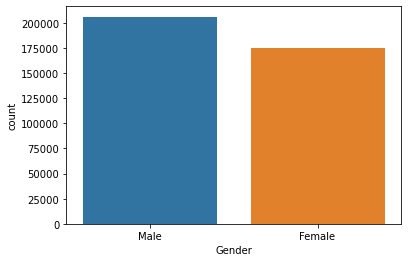

In [17]:
sns.countplot(train.Gender)

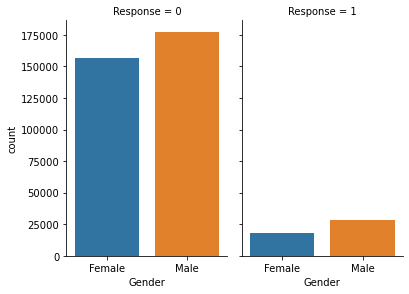

In [18]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

结论：从条形图可以看出，男性的客户群体对汽车保险感兴趣的概率稍高，是13.84%，相较女性客户高出3个百分点。

##  是否有驾照和是否感兴趣

In [19]:
pd.crosstab(train['Driving_License'], train['Response'])  

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


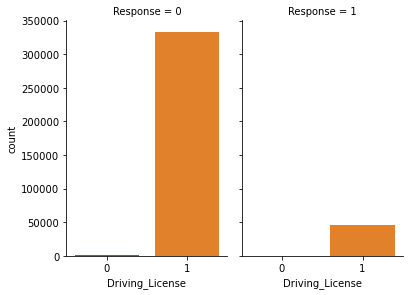

In [20]:
df=train.groupby(['Driving_License','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Driving_License", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

结论：有驾照的客户对汽车保险感兴趣的概率较高，为12.27%，没有驾照的客户仅有5.05%感兴趣。

## 之前是否投保与是否感兴趣

In [21]:
pd.crosstab(train['Previously_Insured'], train['Response'])  

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


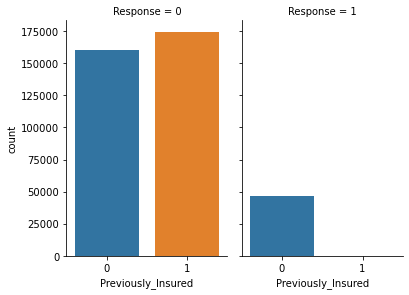

In [22]:
df=train.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Previously_Insured", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

结论：没有购买汽车保险的客户响应概率更高，为22.54%，有购买汽车保险的客户则没有这一需求，感兴趣的概率仅为0.09%。

## 车龄与是否感兴趣

In [23]:
pd.crosstab(train['Vehicle_Age'], train['Response'])  

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


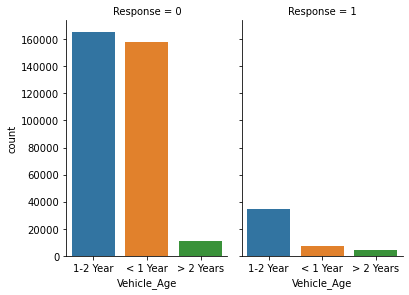

In [24]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

结论：车龄越大，响应概率越高，大于两年的车龄感兴趣的概率最高，为29.37%，其次是1~2年车龄，概率为17.38%。小于1年的仅为4.37%。

## 车辆损坏情况与是否感兴趣

In [25]:
pd.crosstab(train['Vehicle_Damage'], train['Response'])  

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


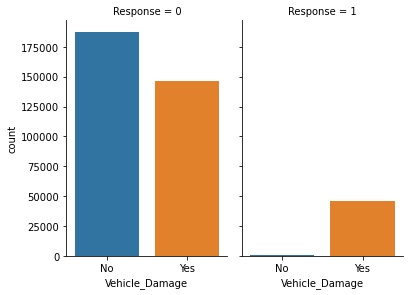

In [26]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

车辆曾经损坏过的客户有较高的响应概率，为23.76%，相比之下，客户过去车辆没有损坏的响应概率仅为0.52%

## 不同年龄与是否感兴趣

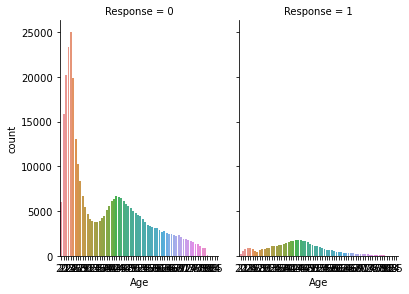

In [104]:
df=train.groupby(['Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

从直方图中可以看出，年龄较高的群体和较低的群体响应的概率较低，30~60岁之前的客户响应概率较高。

## 年度保费与是否感兴趣

<AxesSubplot:ylabel='Annual_Premium'>

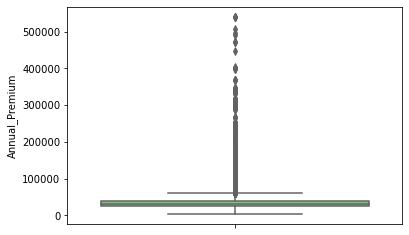

In [28]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

In [105]:
df=train.groupby(['Annual_Premium','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Annual_Premium", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f91f2b41040> (for post_execute):


KeyboardInterrupt: 

## 年龄和年度保费与是否响应关系

Text(0.5, 1.0, 'Age distribution of customers')

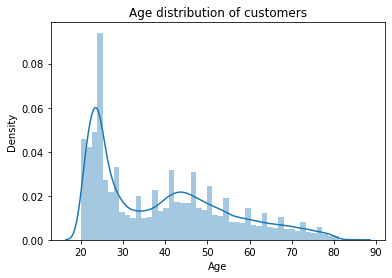

In [30]:
sns.distplot(train.Age).set_title('Age distribution of customers')

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

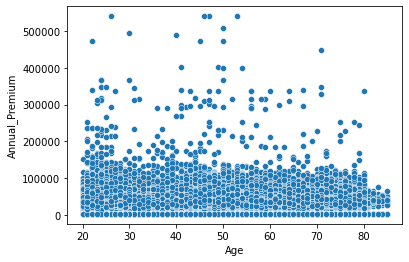

In [31]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

由于年度保费有异常值和极端值，需要对其处理之后再做进一步的解读。

# 数据预处理

此部分工作主要包含字段选择，数据清洗和数据编码，字段的处理如下：

1. 区分columns into numerical features 和 categorical features
2. Gender、Vehicle_Age、Vehicle_Damage：分类型数据转换为数值型编码

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [32]:
# 数据编码
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0}) 
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 1, 'No': 0}) 
# train['Vehicle_Age'] = train['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}) 
train.head() 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


使用dummy方法把Vehicle_Age列one_hot_encoder

In [33]:
df_vehicle_age = pd.get_dummies(train.Vehicle_Age, prefix='Vehicle_Age').astype('int64')

In [34]:
train_drop = train.drop('Vehicle_Age', axis=1)

In [93]:
train_new = pd.concat([train_drop, df_vehicle_age], axis=1)
train_new.set_index('id', inplace=True)
train_new.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
id,,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


In [94]:
# 数据缩放
mm = MinMaxScaler()
train_final = pd.DataFrame(mm.fit_transform(train_new), index=train_new.index, columns=train_new.columns)

测试集做相同的处理：

In [79]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0}) 
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes': 1, 'No': 0}) 

In [87]:
df2_vehicle_age = pd.get_dummies(test.Vehicle_Age, prefix='Vehicle_Age').astype('int64')

In [85]:
df2_vehicle_age = pd.get_dummies(test.Vehicle_Age, prefix='Vehicle_Age').astype('int64')
test_drop = test.drop('Vehicle_Age', axis=1)
test_new = pd.concat([test_drop, df2_vehicle_age], axis=1)

In [143]:
test_new = test_new.set_index('id')
X_test = pd.DataFrame(mm.fit_transform(test_new), index=test_new.index, columns=test_new.columns)
X_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
id,,,,,,,,,,,,
381110,1.0,0.076923,1.0,0.211538,1.0,0.0,0.070633,0.932099,0.148789,0.0,1.0,0.0
381111,1.0,0.307692,1.0,0.538462,0.0,1.0,0.066321,0.037037,0.349481,1.0,0.0,0.0
381112,1.0,0.415385,1.0,0.538462,0.0,1.0,0.079717,0.759259,0.653979,1.0,0.0,0.0
381113,1.0,0.061538,1.0,0.519231,1.0,1.0,0.073978,0.932099,0.612457,0.0,1.0,0.0
381114,1.0,0.107692,1.0,0.538462,1.0,0.0,0.120293,0.932099,0.993080,0.0,1.0,0.0


## Correlation Matrix

<AxesSubplot:>

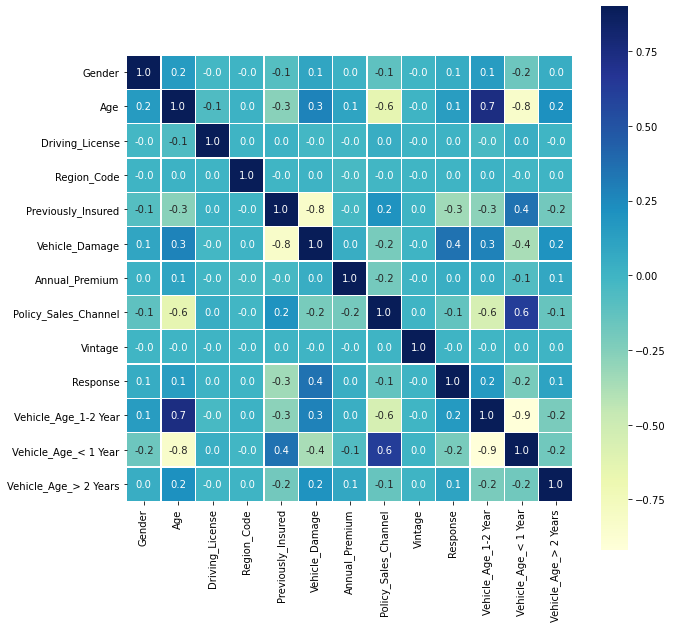

In [96]:
SpearmanCorr = train_final.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

从上图可以看出：
 - Age与Vehicle Age < 1 yr and 1-2 yr 高度相关
 - Previously Insured 与 Vehicle Damage 高度相关
 - Age 与 Policy Sales Channel 高度相关
 - Vehicle Age 与Policy Sales Channel 高度相关


# 数据建模

我们选择使用以下几种模型进行建置，并比较模型的分类效能。

首先在将训练集划分为训练集和验证集，其中训练集用于训练模型，验证集用于验证模型效果。首先导入建模库：

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [136]:
# 划分特征和标签
y = train_final['Response']
X = train_final.drop('Response', axis=1)

# 划分训练集和验证集(分层抽样) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape) 

(304887, 12) (76222, 12) (304887,) (76222,)


In [137]:
# 处理样本不平衡，对1类样本进行过采样
from imblearn.under_sampling import RandomUnderSampler
 
under_sample = RandomUnderSampler(random_state=0)
X_train, y_train = under_sample.fit_sample(X_train, y_train)  

In [138]:
y_train.value_counts()

1.0    37334
0.0    37334
Name: Response, dtype: int64

## KNN算法

In [139]:
# 建立knn
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

print('Simple KNeighborsClassifier accuracy：%.3f' % (accuracy_score(y_val, y_pred)))
print('Simple KNeighborsClassifier f1_score: %.3f' % (f1_score(y_val, y_pred)))  
print('Simple KNeighborsClassifier roc_auc_score: %.3f' % (roc_auc_score(y_val, y_pred))) 

Simple KNeighborsClassifier accuracy：0.714
Simple KNeighborsClassifier f1_score: 0.408
Simple KNeighborsClassifier roc_auc_score: 0.752


In [140]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     66846
         1.0       0.27      0.80      0.41      9376

    accuracy                           0.71     76222
   macro avg       0.62      0.75      0.61     76222
weighted avg       0.88      0.71      0.76     76222



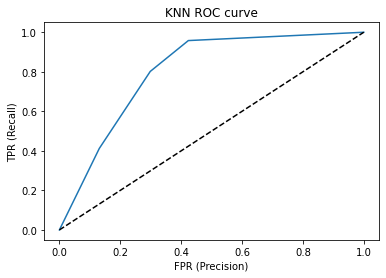

Area under curve (AUC):  0.80299


In [215]:
y_score = knn.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

plt.title('KNN ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

##  Logistic回归

In [164]:
# Logistic回归
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print('Simple LogisticRegression accuracy：%.3f' % (accuracy_score(y_val, y_pred)))
print('Simple LogisticRegression f1_score: %.3f' % (f1_score(y_val, y_pred)))  
print('Simple LogisticRegression roc_auc_score: %.3f' % (roc_auc_score(y_val, y_pred)))

Simple LogisticRegression accuracy：0.640
Simple LogisticRegression f1_score: 0.399
Simple LogisticRegression roc_auc_score: 0.783


### ROC Curve of LogisticRegression

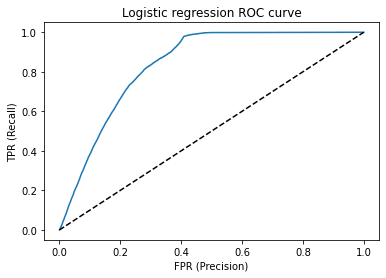

Area under curve (AUC):  0.83585


In [165]:
y_score = lr.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

plt.title('Logistic regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

## 决策树分类

In [145]:
# 决策树
dtc = DecisionTreeClassifier(max_depth=10, random_state=0) 
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val) 

print('Simple DecisionTreeClassifier accuracy：%.3f' % (accuracy_score(y_val, y_pred)))
print('Simple DecisionTreeClassifier f1_score: %.3f' % (f1_score(y_val, y_pred)))  
print('Simple DecisionTreeClassifier roc_auc_score: %.3f' % (roc_auc_score(y_val, y_pred))) 

Simple DecisionTreeClassifier accuracy：0.696
Simple DecisionTreeClassifier f1_score: 0.426
Simple DecisionTreeClassifier roc_auc_score: 0.792


In [146]:
# 以f1为优化标准优化决策树算法
parameters = {
    'splitter': ('best', 'random'),
    'criterion':('gini', 'entropy'),
    'max_depth':[*range(1, 30, 2)],
}

# 建立模型
clf = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf, parameters, cv=5, scoring='f1')
GS.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29],
                         'splitter': ('best', 'random')},
             scoring='f1')

In [206]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [207]:
# 最佳模型
best_model = GS.best_estimator_

y_pred = best_model.predict(X_val) 

print('Randomized DecisionTree accuracy: %.3f' % (accuracy_score(y_val, y_pred)))
print('Randomized DecisionTree f1_score: %.3f' % (f1_score(y_val, y_pred)))  
print('Randomized DecisionTree roc_auc_score: %.3f' % (roc_auc_score(y_val, y_pred))) 

Randomized DecisionTree accuracy: 0.638
Randomized DecisionTree f1_score: 0.399
Randomized DecisionTree roc_auc_score: 0.784


In [161]:
# 属性重要性
imp = pd.DataFrame(zip(X_train.columns, best_model.feature_importances_), columns=['col_name', 'importance'])
imp = imp.sort_values('importance', ascending=False)
imp['accumulative_importance'] = imp['importance'].cumsum() 
imp = round(imp, 3) 
imp 

,col_name,importance,accumulative_importance
5,Vehicle_Damage,0.884,0.884
4,Previously_Insured,0.083,0.967
10,Vehicle_Age_< 1 Year,0.033,1.000
1,Age,0.000,1.000
0,Gender,0.000,1.000
2,Driving_License,0.000,1.000
3,Region_Code,0.000,1.000
6,Annual_Premium,0.000,1.000
7,Policy_Sales_Channel,0.000,1.000
8,Vintage,0.000,1.000


### ROC Curve of DecisionTree

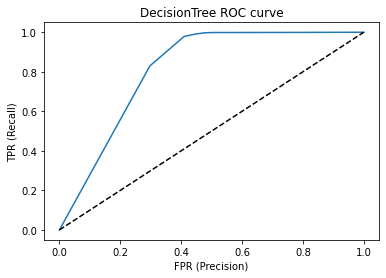

Area under curve (AUC):  0.81405


In [163]:
# 评估模型
y_score = best_model.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

plt.title('DecisionTree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

##  随机森林分类

In [174]:
# 利用RandomizedSearchCV优化随机森林算法
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

rfc = RandomForestClassifier()  
model = RandomizedSearchCV(rfc, parameters, cv = 4,n_iter=10, verbose= 1,random_state= 0, n_jobs = -1)
model.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=0, verbose=1)

In [175]:
# 最佳模型
model.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'criterion': 'entropy'}

In [178]:
# 评估模型
best_model = model.best_estimator_
y_pred = best_model.predict(X_val) 

print('RandomForestClassifier accuracy：%.3f' % (accuracy_score(y_val, y_pred)))
print('RandomForestClassifier f1_score: %.3f' % (f1_score(y_val, y_pred)))  
print('RandomForestClassifier roc_auc_score: %.3f' % (roc_auc_score(y_val, y_pred))) 
print (classification_report(y_val, y_pred))

RandomForestClassifier accuracy：0.691
RandomForestClassifier f1_score: 0.428
RandomForestClassifier roc_auc_score: 0.797
              precision    recall  f1-score   support

         0.0       0.99      0.66      0.79     66846
         1.0       0.28      0.94      0.43      9376

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



### ROC Curve of RandomForest

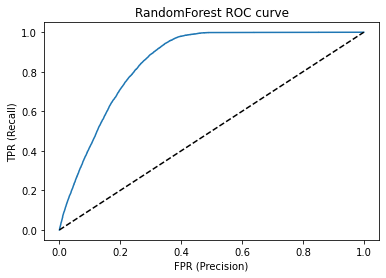

Area under curve (AUC):  0.85446


In [179]:
y_score = best_model.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

plt.title('RandomForest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

## XGBoost Classifier

In [197]:
# pip install hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train, y_train), (X_val, y_val)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_val)
    y_score = model.predict_proba(X_val)[:,1]
    accuracy = accuracy_score(y_val, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_val, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }

In [194]:
# feature_names must be string, and may not contain [, ] or <
X_train = X_train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
X_val = X_val.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
X_test = X_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})

In [198]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)


ROC-AUC Score:                                         
0.8544606970772513                                     
SCORE:                                                 
0.6927396289785102                                     
ROC-AUC Score:                                                                    
0.8544606970772513                                                                
SCORE:                                                                            
0.6985253601322453                                                                
ROC-AUC Score:                                                                    
0.8544606970772513                                                                
SCORE:                                                                            
0.693618640287581                                                                 
ROC-AUC Score:                                                                    
0.8544606970772513           

0.6880034635669492                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6949437170370759                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6935924011440266                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                      

ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6948649996064128                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6929757812704993                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6929364225551679                                                          

0.8544606970772513                                                                 
SCORE:                                                                             
0.692582194117184                                                                  
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6983285665555876                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.694655086457978                                                                  
ROC-AUC Score:                                                              

SCORE:                                                                             
0.6965705439374459                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6940253470126735                                                                 
ROC-AUC Score:                                                                     
0.8544606970772513                                                                 
SCORE:                                                                             
0.6941171840151138                                                                 
100%|██████████| 100/100 [12:13<00:00,  7.34s/trial, best loss: -0.8544606970772513]
The best hyperparameters are :  

{'colsample_bytree': 0.8042989191563339, 

In [201]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8042989191563339, 'gamma': 2.8393729647385735, 'max_depth': 10.0, 'min_child_weight': 4.0, 'reg_alpha': 82.0, 'reg_lambda': 0.48273224924743596}


In [210]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 10, gamma = 2.8393729647385735, 
                            reg_lambda = 0.48273224924743596, reg_alpha = 82, min_child_weight=4.0,
                            colsample_bytree = 0.8042989191563339)
    

In [211]:
xgb_model.fit(X_train,y_train)

[00:36:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8042989191563339,
              gamma=2.8393729647385735, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=4.0, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=82,
              reg_lambda=0.48273224924743596, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### ROC Curve of XGboost Classifier

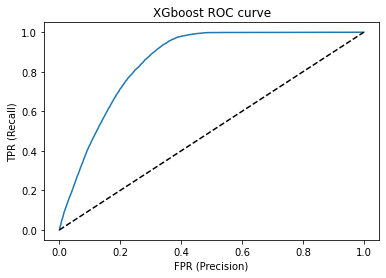

Area under curve (AUC):  0.85459


In [212]:
y_score = xgb_model.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

plt.title('XGboost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))

## LightGBM

In [187]:
lgbm = LGBMClassifier(n_estimators=100, random_state=0)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_val)

print('Simple LGBM accuracy: %.3f' % (accuracy_score(y_val, y_pred)))
print('Simple LGBM f1_score: %.3f' % (f1_score(y_val, y_pred)))  
print('Simple LGBM roc_auc_score: %.3f' % (roc_auc_score(y_val, y_pred))) 

Simple LGBM accuracy: 0.700
Simple LGBM f1_score: 0.433
Simple LGBM roc_auc_score: 0.799


### ROC Curve of LightGBM

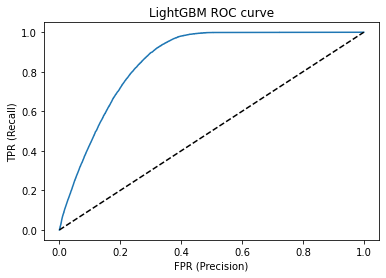

Area under curve (AUC):  0.85738


In [214]:
y_score = lgbm.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

plt.title('LightGBM ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ' ,format(round(auc(fpr,tpr),5)))